In [270]:
# Group Members:
# Caprichia Jeffers - caprichia.jeffers@chase.com
# zheng li zheng.li@chase.com
# Sajid Rauf: - sajid.m.rauf@chase.com
# Stephen McCoy - stephen.w.mccoy@jpmchase.com
# zhuyu.you@chase.com

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 150
pd.options.display.max_rows = 200

# 0. Create Dataset

In [3]:
app_train = pd.read_csv(r'./datasets/application_train.csv').drop_duplicates()
# drop columns with 60+% missing
miss_tbl = (app_train.isna().sum()/app_train.shape[0]).sort_values(ascending=False).reset_index()
#list(miss_tbl[miss_tbl[0]>0.6]['index'].unique())
app_train1 = (
    app_train
    .drop(columns=list(miss_tbl[miss_tbl[0]>0.6]['index'].unique()))  
)

corr_col = app_train1.columns[app_train1.columns.str.contains('AVG|MODE')]
app_train_final = (
    app_train1
    .drop(columns=list(corr_col))  
)

In [6]:
bu_orig = pd.read_csv(r'/Users/zheng/Downloads/bureau.csv').drop_duplicates()
bu_bal = pd.read_csv(r'/Users/zheng/Downloads/bureau_balance.csv').drop_duplicates()
bu_df = (
    bu_orig
    .merge(bu_bal, on='SK_ID_BUREAU', how='left')
)
# drop columns with 60+% missing
miss_tbl = (bu_df.isna().sum()/bu_df.shape[0]).sort_values(ascending=False).reset_index()
#list(miss_tbl[miss_tbl[0]>0.6]['index'].unique())
bu_df_nomiss60 = bu_df.drop(columns=list(miss_tbl[miss_tbl[0]>0.6]['index'].unique()))
bu_df_nomiss60.shape
bu_df_final = (
    bu_df_nomiss60
    .drop(columns={'SK_ID_BUREAU'})
    .groupby('SK_ID_CURR')
    .mean()
    .add_suffix("_AVG")
    .reset_index()
)
bu_df_final.head()

,SK_ID_CURR,DAYS_CREDIT_AVG,CREDIT_DAY_OVERDUE_AVG,DAYS_CREDIT_ENDDATE_AVG,DAYS_ENDDATE_FACT_AVG,CNT_CREDIT_PROLONG_AVG,AMT_CREDIT_SUM_AVG,AMT_CREDIT_SUM_DEBT_AVG,AMT_CREDIT_SUM_LIMIT_AVG,AMT_CREDIT_SUM_OVERDUE_AVG,DAYS_CREDIT_UPDATE_AVG,AMT_ANNUITY_AVG,MONTHS_BALANCE_AVG
0,100001,-1009.284884,0.0,-456.029070,-908.421429,0.0,161516.250000,23893.770349,0.0000,0.0,-127.651163,1236.244186,-16.279070
1,100002,-996.781818,0.0,-452.800000,-808.400000,0.0,111388.838727,70223.142857,3198.8565,0.0,-631.963636,0.000000,-24.554545
2,100003,-1400.750000,0.0,-544.500000,-1097.333333,0.0,254350.125000,0.000000,202500.0000,0.0,-816.000000,NaN,NaN
3,100004,-867.000000,0.0,-488.500000,-532.500000,0.0,94518.900000,0.000000,0.0000,0.0,-532.000000,NaN,NaN
4,100005,-272.380952,0.0,253.428571,-123.000000,0.0,175903.714286,132923.785714,0.0000,0.0,-81.952381,608.785714,-4.333333


In [7]:
cc_bal    = pd.read_csv(r"/Users/zheng/Downloads/credit_card_balance.csv").drop_duplicates()
miss_tbl = (cc_bal.isna().sum()/cc_bal.shape[0]).sort_values(ascending=False).reset_index()
cc_bal_nomiss60 = cc_bal.drop(columns=list(miss_tbl[miss_tbl[0]>0.6]['index'].unique()))
cc_bal_final = (
    cc_bal_nomiss60
    .drop(columns={'SK_ID_PREV'})
    .groupby('SK_ID_CURR')
    .mean()
    .add_suffix("_AVG")
    .reset_index()
)
cc_bal_final.head()

,SK_ID_CURR,MONTHS_BALANCE_AVG,AMT_BALANCE_AVG,AMT_CREDIT_LIMIT_ACTUAL_AVG,AMT_DRAWINGS_ATM_CURRENT_AVG,AMT_DRAWINGS_CURRENT_AVG,AMT_DRAWINGS_OTHER_CURRENT_AVG,AMT_DRAWINGS_POS_CURRENT_AVG,AMT_INST_MIN_REGULARITY_AVG,AMT_PAYMENT_CURRENT_AVG,AMT_PAYMENT_TOTAL_CURRENT_AVG,AMT_RECEIVABLE_PRINCIPAL_AVG,AMT_RECIVABLE_AVG,AMT_TOTAL_RECEIVABLE_AVG,CNT_DRAWINGS_ATM_CURRENT_AVG,CNT_DRAWINGS_CURRENT_AVG,CNT_DRAWINGS_OTHER_CURRENT_AVG,CNT_DRAWINGS_POS_CURRENT_AVG,CNT_INSTALMENT_MATURE_CUM_AVG,SK_DPD_AVG,SK_DPD_DEF_AVG
0,100006,-3.5,0.000000,270000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
1,100011,-38.5,54482.111149,164189.189189,2432.432432,2432.432432,0.0,0.0,3956.221849,4843.064189,4520.067568,52402.088919,54433.179122,54433.179122,0.054054,0.054054,0.0,0.0,25.767123,0.000000,0.000000
2,100013,-48.5,18159.919219,131718.750000,6350.000000,5953.125000,0.0,0.0,1454.539551,7168.346250,6817.172344,17255.559844,18101.079844,18101.079844,0.255556,0.239583,0.0,0.0,18.719101,0.010417,0.010417
3,100021,-10.0,0.000000,675000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
4,100023,-7.5,0.000000,135000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000


In [8]:
ins_pmts  = pd.read_csv(r"/Users/zheng/Downloads/installments_payments.csv").drop_duplicates()
miss_tbl = (ins_pmts.isna().sum()/ins_pmts.shape[0]).sort_values(ascending=False).reset_index()
ins_pmts_nomiss60 = ins_pmts.drop(columns=list(miss_tbl[miss_tbl[0]>0.6]['index'].unique()))
ins_pmts_final = (
    ins_pmts_nomiss60
    .drop(columns={'SK_ID_PREV'})
    .groupby('SK_ID_CURR')
    .mean()
    .add_suffix("_AVG")
    .reset_index()
)
ins_pmts_final.head()

,SK_ID_CURR,NUM_INSTALMENT_VERSION_AVG,NUM_INSTALMENT_NUMBER_AVG,DAYS_INSTALMENT_AVG,DAYS_ENTRY_PAYMENT_AVG,AMT_INSTALMENT_AVG,AMT_PAYMENT_AVG
0,100001,1.142857,2.714286,-2187.714286,-2195.000000,5885.132143,5885.132143
1,100002,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
2,100003,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
3,100004,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
4,100005,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000


In [9]:
cash_bal  = pd.read_csv(r"/Users/zheng/Downloads/POS_CASH_balance.csv").drop_duplicates()
miss_tbl = (cash_bal.isna().sum()/cash_bal.shape[0]).sort_values(ascending=False).reset_index()
cash_bal_nomiss60 = cash_bal.drop(columns=list(miss_tbl[miss_tbl[0]>0.6]['index'].unique()))
cash_bal_final = (
    cash_bal_nomiss60
    .drop(columns={'SK_ID_PREV'})
    .groupby('SK_ID_CURR')
    .mean()
    .add_suffix("_AVG")
    .reset_index()
)
cash_bal_final.head()

,SK_ID_CURR,MONTHS_BALANCE_AVG,CNT_INSTALMENT_AVG,CNT_INSTALMENT_FUTURE_AVG,SK_DPD_AVG,SK_DPD_DEF_AVG
0,100001,-72.555556,4.000000,1.444444,0.777778,0.777778
1,100002,-10.000000,24.000000,15.000000,0.000000,0.000000
2,100003,-43.785714,10.107143,5.785714,0.000000,0.000000
3,100004,-25.500000,3.750000,2.250000,0.000000,0.000000
4,100005,-20.000000,11.700000,7.200000,0.000000,0.000000


In [10]:
prev_appl = pd.read_csv(r"/Users/zheng/Downloads/previous_application.csv").drop_duplicates()
miss_tbl = (prev_appl.isna().sum()/prev_appl.shape[0]).sort_values(ascending=False).reset_index()
prev_appl_nomiss60 = prev_appl.drop(columns=list(miss_tbl[miss_tbl[0]>0.6]['index'].unique()))
prev_appl_final = (
    prev_appl_nomiss60
    .drop(columns={'SK_ID_PREV'})
    .groupby('SK_ID_CURR')
    .mean()
    .add_suffix("_AVG")
    .reset_index()
)
prev_appl_final.head()

,SK_ID_CURR,AMT_ANNUITY_AVG,AMT_APPLICATION_AVG,AMT_CREDIT_AVG,AMT_DOWN_PAYMENT_AVG,AMT_GOODS_PRICE_AVG,HOUR_APPR_PROCESS_START_AVG,NFLAG_LAST_APPL_IN_DAY_AVG,RATE_DOWN_PAYMENT_AVG,DAYS_DECISION_AVG,SELLERPLACE_AREA_AVG,CNT_PAYMENT_AVG,DAYS_FIRST_DRAWING_AVG,DAYS_FIRST_DUE_AVG,DAYS_LAST_DUE_1ST_VERSION_AVG,DAYS_LAST_DUE_AVG,DAYS_TERMINATION_AVG,NFLAG_INSURED_ON_APPROVAL_AVG
0,100001,3951.000,24835.50,23787.00,2520.0,24835.5,13.000000,1.0,0.104326,-1740.0,23.0,8.0,365243.0,-1709.000000,-1499.000000,-1619.000000,-1612.000000,0.000000
1,100002,9251.775,179055.00,179055.00,0.0,179055.0,9.000000,1.0,0.000000,-606.0,500.0,24.0,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
2,100003,56553.990,435436.50,484191.00,3442.5,435436.5,14.666667,1.0,0.050030,-1305.0,533.0,10.0,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
3,100004,5357.250,24282.00,20106.00,4860.0,24282.0,5.000000,1.0,0.212008,-815.0,30.0,4.0,365243.0,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
4,100005,4813.200,22308.75,20076.75,4464.0,44617.5,10.500000,1.0,0.108964,-536.0,18.0,12.0,365243.0,-706.000000,-376.000000,-466.000000,-460.000000,0.000000


In [11]:
df = (
    app_train_final
    .merge(bu_df_final, on='SK_ID_CURR', how='left')
    .merge(cc_bal_final, on='SK_ID_CURR', how='left')
    .merge(ins_pmts_final, on='SK_ID_CURR', how='left')
    .merge(cash_bal_final, on='SK_ID_CURR', how='left')
    .merge(prev_appl_final, on='SK_ID_CURR', how='left')   
)

In [12]:
df.shape

(307511, 143)

# 1. Data Quality Checks
    - Missingness and Outliers

In [13]:
df.sample(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_AVG,CREDIT_DAY_OVERDUE_AVG,DAYS_CREDIT_ENDDATE_AVG,DAYS_ENDDATE_FACT_AVG,CNT_CREDIT_PROLONG_AVG,AMT_CREDIT_SUM_AVG,AMT_CREDIT_SUM_DEBT_AVG,AMT_CREDIT_SUM_LIMIT_AVG,AMT_CREDIT_SUM_OVERDUE_AVG,DAYS_CREDIT_UPDATE_AVG,AMT_ANNUITY_AVG_x,MONTHS_BALANCE_AVG_x,MONTHS_BALANCE_AVG_y,AMT_BALANCE_AVG,AMT_CREDIT_LIMIT_ACTUAL_AVG,AMT_DRAWINGS_ATM_CURRENT_AVG,AMT_DRAWINGS_CURRENT_AVG,AMT_DRAWINGS_OTHER_CURRENT_AVG,AMT_DRAWINGS_POS_CURRENT_AVG,AMT_INST_MIN_REGULARITY_AVG,AMT_PAYMENT_CURRENT_AVG,AMT_PAYMENT_TOTAL_CURRENT_AVG,AMT_RECEIVABLE_PRINCIPAL_AVG,AMT_RECIVABLE_AVG,AMT_TOTAL_RECEIVABLE_AVG,CNT_DRAWINGS_ATM_CURRENT_AVG,CNT_DRAWINGS_CURRENT_AVG,CNT_DRAWINGS_OTHER_CURRENT_AVG,CNT_DRAWINGS_POS_CURRENT_AVG,CNT_INSTALMENT_MATURE_CUM_AVG,SK_DPD_AVG_x,SK_DPD_DEF_AVG_x,NUM_INSTALMENT_VERSION_AVG,NUM_INSTALMENT_NUMBER_AVG,DAYS_INSTALMENT_AVG,DAYS_ENTRY_PAYMENT_AVG,AMT_INSTALMENT_AVG,AMT_PAYMENT_AVG,MONTHS_BALANCE_AVG,CNT_INSTALMENT_AVG,CNT_INSTALMENT_FUTURE_AVG,SK_DPD_AVG_y,SK_DPD_DEF_AVG_y,AMT_ANNUITY_AVG_y,AMT_APPLICATION_AVG,AMT_CREDIT_AVG,AMT_DOWN_PAYMENT_AVG,AMT_GOODS_PRICE_AVG,HOUR_APPR_PROCESS_START_AVG,NFLAG_LAST_APPL_IN_DAY_AVG,RATE_DOWN_PAYMENT_AVG,DAYS_DECISION_AVG,SELLERPLACE_AREA_AVG,CNT_PAYMENT_AVG,DAYS_FIRST_DRAWING_AVG,DAYS_FIRST_DUE_AVG,DAYS_LAST_DUE_1ST_VERSION_AVG,DAYS_LAST_DUE_AVG,DAYS_TERMINATION_AVG,NFLAG_INSURED_ON_APPROVAL_AVG
26455,130756,0,Revolving loans,F,N,Y,0,135000.0,382500.0,19125.0,382500.0,Unaccompanied,Pensioner,Higher education,Married,Municipal apartment,0.072508,-21055,365243,-5107.0,-3827,1,0,0,1,0,0,NaN,2.0,1,1,SUNDAY,16,0,0,0,0,0,0,XNA,0.766614,0.727174,0.551381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-174.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-1194.0,0.0,-233.75,-858.8,0.0,544561.3125,107754.75,0.0,0.0,-152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.111111,3.222222,-77.333333,-87.555556,4525.0000,8528.9300,-4.000000,24.000000,22.000000,0.000000,0.000000,4689.630,85945.500,104098.500,0.0,85945.50,11.00,1.0,0.000000,-174.00,1200.00,24.000000,365243.0,-144.0,546.0,365243.0,365243.0,1.0
216545,350912,0,Cash loans,F,N,Y,0,202500.0,640080.0,29839.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.030755,-9723,-213,-4192.0,-2312,1,1,1,1,1,0,NaN,1.0,2,2,TUESDAY,18,1,1,0,1,1,0,Business Entity Type 3,NaN,0.347412,NaN,0.0739,0.0549,0.9871,0.08,0.069,0.3333,0.0504,0.0776,0.0011,0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 143 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL_AVG
dtypes: float64(90), int64(41), object(12)
memory usage: 337.8+ MB


In [15]:
# drop columns with 60+% missing
miss_tbl = (df.isna().sum()/df.shape[0]).sort_values(ascending=False).reset_index()
#list(miss_tbl[miss_tbl[0]>0.6]['index'].unique())
df_nomiss60 = df.drop(columns=list(miss_tbl[miss_tbl[0]>0.6]['index'].unique()))

In [16]:
df_nomiss60.shape

(307511, 121)

In [17]:
# drop highly correlated measure (keep median; drop ang, mode)
df_drop = df_nomiss60#.drop(columns=list(df_nomiss60.columns[df_nomiss60.columns.str.contains('AVG|MODE')]))

In [18]:
df_drop.shape

(307511, 121)

In [19]:
df_drop.TARGET.isna().sum()

0

In [20]:
df_drop.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [21]:
df_drop.dtypes.value_counts()

float64    68
int64      41
object     12
dtype: int64

In [22]:
df_drop.shape

(307511, 121)

In [23]:
# Create correlation matrix
corr_mat = df_drop.corr(method='pearson')
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()

In [24]:
sorted_mat[sorted_mat > 0.8].tail(25)

DAYS_ENDDATE_FACT_AVG        DAYS_CREDIT_AVG               0.801587
AMT_GOODS_PRICE_AVG          AMT_ANNUITY_AVG_y             0.810091
DAYS_DECISION_AVG            DAYS_ENTRY_PAYMENT_AVG        0.813631
                             DAYS_INSTALMENT_AVG           0.813832
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.825575
DAYS_DECISION_AVG            MONTHS_BALANCE_AVG            0.828247
ELEVATORS_MEDI               APARTMENTS_MEDI               0.837447
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.860517
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.860627
LIVINGAREA_MEDI              ELEVATORS_MEDI                0.868341
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.879161
LIVINGAREA_MEDI              APARTMENTS_MEDI               0.915947
AMT_GOODS_PRICE_AVG          AMT_CREDIT_AVG                0.920165
                             AMT_APPLICATION_AVG           0.924799
MONTHS_BALANCE_AVG           DAYS_ENTRY_PAYMENT_

In [25]:
sorted_mat[sorted_mat < -0.8]

FLAG_EMP_PHONE                 DAYS_EMPLOYED            -0.999755
DAYS_LAST_DUE_1ST_VERSION_AVG  DAYS_FIRST_DRAWING_AVG   -0.848562
dtype: float64

In [26]:
# drop 1 variable with correlation of 0.8+
list(pd.DataFrame(sorted_mat[(sorted_mat < -0.8) | (sorted_mat > 0.8)]).reset_index()['level_0'])

['FLAG_EMP_PHONE',
 'DAYS_LAST_DUE_1ST_VERSION_AVG',
 'DAYS_ENDDATE_FACT_AVG',
 'AMT_GOODS_PRICE_AVG',
 'DAYS_DECISION_AVG',
 'DAYS_DECISION_AVG',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_DECISION_AVG',
 'ELEVATORS_MEDI',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVINGAREA_MEDI',
 'CNT_FAM_MEMBERS',
 'LIVINGAREA_MEDI',
 'AMT_GOODS_PRICE_AVG',
 'AMT_GOODS_PRICE_AVG',
 'MONTHS_BALANCE_AVG',
 'MONTHS_BALANCE_AVG',
 'DAYS_TERMINATION_AVG',
 'REGION_RATING_CLIENT_W_CITY',
 'CNT_INSTALMENT_FUTURE_AVG',
 'AMT_CREDIT_AVG',
 'AMT_PAYMENT_AVG',
 'AMT_GOODS_PRICE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_ENTRY_PAYMENT_AVG']

In [27]:
df2 = (
    df_drop
    .drop(columns={'FLAG_EMP_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'ELEVATORS_MEDI',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVINGAREA_MEDI',
 'CNT_FAM_MEMBERS',
 'LIVINGAREA_MEDI',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_GOODS_PRICE',
 'OBS_60_CNT_SOCIAL_CIRCLE'})
)
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,NONLIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_AVG,CREDIT_DAY_OVERDUE_AVG,DAYS_CREDIT_ENDDATE_AVG,DAYS_ENDDATE_FACT_AVG,CNT_CREDIT_PROLONG_AVG,AMT_CREDIT_SUM_AVG,AMT_CREDIT_SUM_DEBT_AVG,AMT_CREDIT_SUM_LIMIT_AVG,AMT_CREDIT_SUM_OVERDUE_AVG,DAYS_CREDIT_UPDATE_AVG,NUM_INSTALMENT_VERSION_AVG,NUM_INSTALMENT_NUMBER_AVG,DAYS_INSTALMENT_AVG,DAYS_ENTRY_PAYMENT_AVG,AMT_INSTALMENT_AVG,AMT_PAYMENT_AVG,MONTHS_BALANCE_AVG,CNT_INSTALMENT_AVG,CNT_INSTALMENT_FUTURE_AVG,SK_DPD_AVG_y,SK_DPD_DEF_AVG_y,AMT_ANNUITY_AVG_y,AMT_APPLICATION_AVG,AMT_CREDIT_AVG,AMT_DOWN_PAYMENT_AVG,AMT_GOODS_PRICE_AVG,HOUR_APPR_PROCESS_START_AVG,NFLAG_LAST_APPL_IN_DAY_AVG,RATE_DOWN_PAYMENT_AVG,DAYS_DECISION_AVG,SELLERPLACE_AREA_AVG,CNT_PAYMENT_AVG,DAYS_FIRST_DRAWING_AVG,DAYS_FIRST_DUE_AVG,DAYS_LAST_DUE_1ST_VERSION_AVG,DAYS_LAST_DUE_AVG,DAYS_TERMINATION_AVG,NFLAG_INSURED_ON_APPROVAL_AVG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,Laborers,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0250,0.0369,0.9722,0.0690,0.0833,0.0375,0.00,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-996.781818,0.0,-452.8,-808.400000,0.0,111388.838727,70223.142857,3198.8565,0.0,-631.963636,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,-10.000000,24.000000,15.000000,0.0,0.0,9251.775,179055.00,179055.00,0.00,179055.00,9.000000,1.0,0.000000,-606.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,Core staff,1,MONDAY,11,0,0,0,0,School,0.311267,0.622246,NaN,0.0968,0.0529,0.9851,0.0345,0.2917,0.0132,0.01,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1400.750000,0.0,-544.5,-1097.333333,0.0,254350.125000,0.000000,202500.0000,0.0,-816.000000,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000,-43.785714,10.107143,5.785714,0.0,0.0,56553.990,435436.50,484191.00,3442.50,435436.50,14.666667,1.0,0.050030,-1305.000000,533.000000,10.000000,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,Laborers,2,MONDAY,9,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-867.000000,0.0,-488.

In [28]:
df2.dtypes.value_counts()

float64    62
int64      37
object     12
dtype: int64

In [29]:
df2.shape

(307511, 111)

In [30]:
pd.Series(df2.isna().sum()/df2.shape[0]).sort_values(ascending=False).head(10)

LANDAREA_MEDI                   0.593767
BASEMENTAREA_MEDI               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MEDI              0.551792
APARTMENTS_MEDI                 0.507497
ENTRANCES_MEDI                  0.503488
FLOORSMAX_MEDI                  0.497608
YEARS_BEGINEXPLUATATION_MEDI    0.487810
OCCUPATION_TYPE                 0.313455
DAYS_ENDDATE_FACT_AVG           0.250905
dtype: float64

In [31]:
#profile = ProfileReport(df2, minimal=True)
#profile.to_file("df2_profile_output.html")

In [32]:
# Impute Missing Values
df2 = df2.fillna(df2.median())

#df2[df2.columns] = df2[df2.columns].apply(pd.to_numeric, errors='coerce')
#df2 = df2.fillna(df2.median()) 

/var/folders/hn/3wwh9yy571jbqjltnqglztg80000gn/T/ipykernel_65032/2311845062.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2 = df2.fillna(df2.median())


In [33]:
#profile_bu = ProfileReport(bu, minimal=True)
#profile_bu.to_file('bu_profile_output.html')

In [34]:
bu=bu_orig

In [35]:
bu['current_status_active_01']  = np.where((bu['CREDIT_ACTIVE'] == 'Active') & (bu['CREDIT_DAY_OVERDUE']>0)   & (bu['CREDIT_DAY_OVERDUE'] < 30) & (bu['DAYS_CREDIT_UPDATE'] > -60) & (bu['DAYS_CREDIT_UPDATE'] < 1), 1, 0)
bu['current_status_active_30p'] = np.where((bu['CREDIT_ACTIVE'] == 'Active') & (bu['CREDIT_DAY_OVERDUE']>29)  & (bu['DAYS_CREDIT_UPDATE'] > -60) & (bu['DAYS_CREDIT_UPDATE'] < 1), 1, 0)

In [36]:
bu['CREDIT_TYPE'] = np.where((bu['CREDIT_TYPE'] == 'Consumer credit') | (bu['CREDIT_TYPE'] == 'Credit card'), bu['CREDIT_TYPE'], 'Other')

In [37]:
bu['bu_data_ind'] = 1

In [38]:
bu_bal_tmp = bu_bal

In [39]:
bu_bal_tmp['MONTHS_BALANCE'] = np.where(bu_bal['MONTHS_BALANCE'] == 0 , -999, bu_bal['MONTHS_BALANCE'])

In [40]:
bu_bal_recent = bu_bal_tmp.sort_values(by = ['SK_ID_BUREAU','MONTHS_BALANCE'])

In [41]:
bu_bal_recent = bu_bal_recent.groupby('SK_ID_BUREAU').last().reset_index()

In [42]:
bu_bal_recent['STATUS'] = np.where(bu_bal_recent['MONTHS_BALANCE'] < -3 , 'X', bu_bal_recent['STATUS'])

In [43]:
bu_bal_recent = bu_bal_recent.drop('MONTHS_BALANCE',axis=1)

In [44]:
bu_bal_recent['bureau_balance_data_ind'] = 1

In [45]:
bu_bal_delq_01 = (bu_bal_recent['STATUS'] == '1') | (bu_bal_recent['STATUS'] == '2') | (bu_bal_recent['STATUS'] == '3') | (bu_bal_recent['STATUS'] == '4') | (bu_bal_recent['STATUS'] == '5') | (bu_bal_recent['STATUS'] == '6')
bu_bal_delq_30 = (bu_bal_recent['STATUS'] == '2') | (bu_bal_recent['STATUS'] == '3') | (bu_bal_recent['STATUS'] == '4') | (bu_bal_recent['STATUS'] == '5') | (bu_bal_recent['STATUS'] == '6')

In [46]:
bu_bal_recent['current_status_active_01_tmp'] = np.where(bu_bal_delq_01, 1, 0)
bu_bal_recent['current_status_active_30_tmp'] = np.where(bu_bal_delq_30, 1, 0)

In [47]:
bu_bal_recent = bu_bal_recent.drop('STATUS', axis = 1)

In [48]:
bu_bal_delq_01 = (bu_bal['STATUS'] == '1') | (bu_bal['STATUS'] == '2') | (bu_bal['STATUS'] == '3') | (bu_bal['STATUS'] == '4') | (bu_bal['STATUS'] == '5') | (bu_bal['STATUS'] == '6')
bu_bal_delq_30 = (bu_bal['STATUS'] == '2') | (bu_bal['STATUS'] == '3') | (bu_bal['STATUS'] == '4') | (bu_bal['STATUS'] == '5') | (bu_bal['STATUS'] == '6')

In [49]:
bu_bal['ever_dlq_01'] = np.where(bu_bal_delq_01, 1, 0)
bu_bal['ever_dlq_30'] = np.where(bu_bal_delq_30, 1, 0)

In [50]:
bu_bal_everdlq = bu_bal.groupby('SK_ID_BUREAU').agg({'ever_dlq_01': 'max', 'ever_dlq_30': 'max'}).reset_index()

In [51]:
print(bu_bal_everdlq.shape)
print(bu_bal_recent.shape)
print(bu.shape)

(817395, 3)
(817395, 4)
(1716428, 20)


In [52]:
bu = pd.merge(bu,bu_bal_recent,how='left',on='SK_ID_BUREAU')

In [53]:
bu = pd.merge(bu,bu_bal_everdlq,how='left',on='SK_ID_BUREAU')

In [54]:
# Pick the max delinquncy from bureau.csv and bureau_balance.csv
bu['current_status_active_01']  = np.where(bu['CREDIT_ACTIVE'] == 'Active', np.nanmax(bu[['current_status_active_01', 'current_status_active_01_tmp']], axis=1), bu['current_status_active_01_tmp'])
bu['current_status_active_30p'] = np.where(bu['CREDIT_ACTIVE'] == 'Active', np.nanmax(bu[['current_status_active_30p','current_status_active_30_tmp']], axis=1), bu['current_status_active_30_tmp'])

In [55]:
bu = bu.drop(["current_status_active_01_tmp","current_status_active_30_tmp"], axis=1)

In [56]:
# Ever delinquency should be higher than active delinquency
bu['ever_dlq_01'] = np.where(bu['CREDIT_ACTIVE'] == 'Active', np.nanmax(bu[['current_status_active_01', 'ever_dlq_01']], axis=1), bu['ever_dlq_01'])
bu['ever_dlq_30'] = np.where(bu['CREDIT_ACTIVE'] == 'Active', np.nanmax(bu[['current_status_active_30p','ever_dlq_30']], axis=1), bu['ever_dlq_30'])

/var/folders/hn/3wwh9yy571jbqjltnqglztg80000gn/T/ipykernel_65032/3755732888.py:2: RuntimeWarning: All-NaN axis encountered
  bu['ever_dlq_01'] = np.where(bu['CREDIT_ACTIVE'] == 'Active', np.nanmax(bu[['current_status_active_01', 'ever_dlq_01']], axis=1), bu['ever_dlq_01'])
/var/folders/hn/3wwh9yy571jbqjltnqglztg80000gn/T/ipykernel_65032/3755732888.py:3: RuntimeWarning: All-NaN axis encountered
  bu['ever_dlq_30'] = np.where(bu['CREDIT_ACTIVE'] == 'Active', np.nanmax(bu[['current_status_active_30p','ever_dlq_30']], axis=1), bu['ever_dlq_30'])


In [57]:
bu['ever_dlq_01']

0          NaN
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1716423    0.0
1716424    NaN
1716425    NaN
1716426    NaN
1716427    NaN
Name: ever_dlq_01, Length: 1716428, dtype: float64

In [58]:
bu['bureau_balance_data_ind'] = np.where(bu['bureau_balance_data_ind'] != 1, 0, bu['bureau_balance_data_ind'])

In [59]:
delq_check1 = pd.crosstab(bu.current_status_active_01, bu.ever_dlq_01, margins=True)
delq_check1

ever_dlq_01,0.0,1.0,All
current_status_active_01,,,
0.0,1023252,91011,1114263
1.0,0,8900,8900
All,1023252,99911,1123163


In [60]:
delq_check2 = pd.crosstab(bu.current_status_active_30p, bu.ever_dlq_30, margins=True)
delq_check2

ever_dlq_30,0.0,1.0,All
current_status_active_30p,,,
0.0,1107546,13171,1120717
1.0,0,2446,2446
All,1107546,15617,1123163


In [61]:
data_check1 = pd.crosstab(bu.bu_data_ind, bu.bureau_balance_data_ind, margins=True)
data_check1

bureau_balance_data_ind,0.0,1.0,All
bu_data_ind,,,
1,942074,774354,1716428
All,942074,774354,1716428


In [62]:
bu_summary = bu.groupby('SK_ID_CURR').agg({'DAYS_CREDIT':'min', 'AMT_CREDIT_MAX_OVERDUE':'sum', 'AMT_CREDIT_SUM':'sum', 'AMT_CREDIT_SUM_DEBT':'sum', 'AMT_CREDIT_SUM_OVERDUE':'sum', 'current_status_active_01':'sum', 'current_status_active_30p':'sum', 'ever_dlq_01':'sum', 'ever_dlq_30':'sum'}).reset_index()

In [63]:
#summarize "Active Loans"
bu_active = bu[bu['CREDIT_ACTIVE'] == 'Active']

In [64]:
bu_active['ACTIVE_LOAN_CNT'] = 1

/var/folders/hn/3wwh9yy571jbqjltnqglztg80000gn/T/ipykernel_65032/2954893198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bu_active['ACTIVE_LOAN_CNT'] = 1


In [65]:
bu_active_summary = bu_active.groupby('SK_ID_CURR').agg({'ACTIVE_LOAN_CNT': 'sum', 'AMT_CREDIT_SUM':'sum', 'AMT_CREDIT_SUM_DEBT':'sum', 'AMT_CREDIT_SUM_OVERDUE':'sum'}).reset_index()

In [66]:
bu_active_summary = bu_active_summary.rename(columns={"AMT_CREDIT_SUM": "AMT_CREDIT_SUM_ACTIVE", "AMT_CREDIT_SUM_DEBT": "AMT_CREDIT_SUM_DEBT_ACTIVE", "AMT_CREDIT_SUM_OVERDUE": "AMT_CREDIT_SUM_OVERDUE_ACTIVE"})

In [67]:
bu_summary = pd.merge(bu_summary,bu_active_summary,how='left',on='SK_ID_CURR')

In [68]:
bu_summary.dtypes

SK_ID_CURR                         int64
DAYS_CREDIT                        int64
AMT_CREDIT_MAX_OVERDUE           float64
AMT_CREDIT_SUM                   float64
AMT_CREDIT_SUM_DEBT              float64
AMT_CREDIT_SUM_OVERDUE           float64
current_status_active_01         float64
current_status_active_30p        float64
ever_dlq_01                      float64
ever_dlq_30                      float64
ACTIVE_LOAN_CNT                  float64
AMT_CREDIT_SUM_ACTIVE            float64
AMT_CREDIT_SUM_DEBT_ACTIVE       float64
AMT_CREDIT_SUM_OVERDUE_ACTIVE    float64
dtype: object

In [69]:
#bu_summary['AMT_CREDIT_SUM']             = bu_summary['AMT_CREDIT_SUM'].fillna(0)
#bu_summary['AMT_CREDIT_SUM_DEBT']        = bu_summary['AMT_CREDIT_SUM_DEBT'].fillna(0)
#bu_summary['current_status_active_01']   = bu_summary['current_status_active_01'].fillna(0)
#bu_summary['current_status_active_30p']  = bu_summary['current_status_active_30p'].fillna(0)
#
#bu_summary['ever_dlq_01']   = bu_summary['ever_dlq_01'].fillna(0)
#bu_summary['ever_dlq_30']   = bu_summary['ever_dlq_30'].fillna(0)
#
#bu_summary['AMT_CREDIT_MAX_OVERDUE']        = bu_summary['AMT_CREDIT_MAX_OVERDUE'].fillna(0)
#bu_summary['ACTIVE_LOAN_CNT']               = bu_summary['ACTIVE_LOAN_CNT'].fillna(0)
#bu_summary['AMT_CREDIT_SUM_ACTIVE']         = bu_summary['AMT_CREDIT_SUM_ACTIVE'].fillna(0)
#bu_summary['AMT_CREDIT_SUM_DEBT_ACTIVE']    = bu_summary['AMT_CREDIT_SUM_DEBT_ACTIVE'].fillna(0)
#bu_summary['AMT_CREDIT_SUM_OVERDUE_ACTIVE'] = bu_summary['AMT_CREDIT_SUM_OVERDUE_ACTIVE'].fillna(0)

#numerics = ['int64', 'float64', 'int32', 'int16']
#bu_summary.select_dtypes(include=numerics).fillna(bu_summary.median(), inplace=True)

bu_summary[bu_summary.columns] = bu_summary[bu_summary.columns].apply(pd.to_numeric, errors='coerce')
bu_summary = bu_summary.fillna(bu_summary.median()) 

In [70]:
bu_summary.select_dtypes(include=numerics)

NameError: name 'numerics' is not defined

In [74]:
bu_summary.isnull().sum()/bu_summary.shape[0]

SK_ID_CURR                       0.0
DAYS_CREDIT                      0.0
AMT_CREDIT_MAX_OVERDUE           0.0
AMT_CREDIT_SUM                   0.0
AMT_CREDIT_SUM_DEBT              0.0
AMT_CREDIT_SUM_OVERDUE           0.0
current_status_active_01         0.0
current_status_active_30p        0.0
ever_dlq_01                      0.0
ever_dlq_30                      0.0
ACTIVE_LOAN_CNT                  0.0
AMT_CREDIT_SUM_ACTIVE            0.0
AMT_CREDIT_SUM_DEBT_ACTIVE       0.0
AMT_CREDIT_SUM_OVERDUE_ACTIVE    0.0
dtype: float64

In [75]:
bu_summary['ACTIVE_LOAN_CNT'].median()     

2.0

In [76]:
bu_summary['CREDIT_HISTORY'] =  bu['DAYS_CREDIT'] * -1

In [77]:
bu_summary = bu_summary.drop('DAYS_CREDIT', axis=1)

In [78]:
bu_summary['bu_data_ind'] = 1

In [79]:
bu_analysis = bu_summary

In [80]:
bu_analysis['UTIL'] = np.where(bu_analysis['AMT_CREDIT_SUM_ACTIVE'] > 0, bu_analysis['AMT_CREDIT_SUM_DEBT_ACTIVE']/bu_analysis['AMT_CREDIT_SUM_ACTIVE'], 0)
bu_analysis['UTIL'] = np.where(bu_analysis['UTIL'] < 0, 0, bu_analysis['UTIL'])
bu_analysis['UTIL'] = np.where(bu_analysis['UTIL'] > 1, 1, bu_analysis['UTIL'])

In [81]:
bu_analysis = bu_analysis.drop(['AMT_CREDIT_SUM','AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_OVERDUE'], axis=1)

In [82]:
bu_analysis['AMT_CREDIT_SUM_ACTIVE_RANGE'] = pd.cut(bu_analysis['AMT_CREDIT_SUM_ACTIVE'], [0, 100000, 450000, 1000000, 100000000])

In [83]:
bu_analysis['AMT_CREDIT_SUM_DEBT_ACTIVE_RANGE'] = pd.cut(bu_analysis['AMT_CREDIT_SUM_DEBT_ACTIVE'], [-10000000, 0, 100000, 250000, 500000, 1000000, 1000000000])

In [84]:
bu_analysis['AMT_CREDIT_SUM_OVERDUE_ACTIVE_RANGE'] = pd.cut(bu_analysis['AMT_CREDIT_SUM_OVERDUE_ACTIVE'], [-10000000, 0, 1000000000])

In [85]:
bu_analysis = bu_analysis.drop(['AMT_CREDIT_SUM_OVERDUE_ACTIVE_RANGE','AMT_CREDIT_SUM_OVERDUE_ACTIVE','AMT_CREDIT_SUM_DEBT_ACTIVE','AMT_CREDIT_SUM_ACTIVE_RANGE','AMT_CREDIT_SUM_ACTIVE'], axis = 1)

In [86]:
bu_analysis = bu_analysis.drop('AMT_CREDIT_MAX_OVERDUE', axis = 1)

In [87]:
bu_analysis['ACTIVE_LOAN_CNT_BIN'] = np.where(bu_analysis['ACTIVE_LOAN_CNT'] <=3, '<3', np.where(bu_analysis['ACTIVE_LOAN_CNT'] <5, '3-4', '5+'))

In [88]:
bu_analysis = bu_analysis.drop('ACTIVE_LOAN_CNT', axis = 1)

In [89]:
col_order = ['SK_ID_CURR', 'bu_data_ind', 'current_status_active_01', 'current_status_active_30p', 'ever_dlq_01', 'ever_dlq_30', 'CREDIT_HISTORY', 'UTIL', 'AMT_CREDIT_SUM_DEBT_ACTIVE_RANGE', 'ACTIVE_LOAN_CNT_BIN']

In [90]:
bu_analysis = bu_analysis[col_order]

In [91]:
bu_analysis['current_status_active_01']  = np.where(bu_analysis['current_status_active_01']  >=2, 2, bu_analysis['current_status_active_01'])
bu_analysis['current_status_active_30p'] = np.where(bu_analysis['current_status_active_30p'] >=2, 2, bu_analysis['current_status_active_30p'])
bu_analysis['ever_dlq_01']               = np.where(bu_analysis['ever_dlq_01'] >=2, 2, bu_analysis['ever_dlq_01'])
bu_analysis['ever_dlq_30']               = np.where(bu_analysis['ever_dlq_30'] >=2, 2, bu_analysis['ever_dlq_30'])

In [92]:
bureau_data_summ = bu_analysis.rename(columns = {'current_status_active_01': 'cnt_dlq_01_current_mo_t', 'current_status_active_30p':'cnt_dlq_30p_current_mo_t', 'ACTIVE_LOAN_CNT_BIN' : 'cnt_active_current_mo', 'AMT_CREDIT_SUM_DEBT_ACTIVE_RANGE' :'debt_active_current_mo', 
                                                'ever_dlq_01' : 'cnt_ever_dlq_01_t', 'ever_dlq_30': 'cnt_ever_dlq_30_t'})

In [93]:
bureau_data_summ['cnt_dlq_01_current_mo'] = np.where(bureau_data_summ['cnt_dlq_01_current_mo_t'] == 0, '0',
                                                     np.where(bureau_data_summ['cnt_dlq_01_current_mo_t'] == 1, '1', '2+'))

In [94]:
bureau_data_summ['cnt_dlq_30p_current_mo'] = np.where(bureau_data_summ['cnt_dlq_30p_current_mo_t'] == 0, '0',
                                                     np.where(bureau_data_summ['cnt_dlq_30p_current_mo_t'] == 1, '1', '2+'))

In [95]:
bureau_data_summ['cnt_ever_dlq_01'] = np.where(bureau_data_summ['cnt_ever_dlq_01_t'] == 0, '0',
                                                     np.where(bureau_data_summ['cnt_ever_dlq_01_t'] == 1, '1', '2+'))

In [96]:
bureau_data_summ['cnt_ever_dlq_30p'] = np.where(bureau_data_summ['cnt_ever_dlq_30_t'] == 0, '0',
                                                     np.where(bureau_data_summ['cnt_ever_dlq_30_t'] == 1, '1', '2+'))

In [97]:
bureau_data_summ = bureau_data_summ.drop(['cnt_dlq_01_current_mo_t','cnt_dlq_30p_current_mo_t','cnt_ever_dlq_01_t','cnt_ever_dlq_30_t'], axis = 1)

In [100]:
cc_bal    = pd.read_csv(r"/Users/zheng/Downloads/credit_card_balance.csv")
ins_pmts  = pd.read_csv(r"/Users/zheng/Downloads/installments_payments.csv")
cash_bal  = pd.read_csv(r"/Users/zheng/Downloads/POS_CASH_balance.csv")
prev_appl = pd.read_csv(r"/Users/zheng/Downloads/previous_application.csv")

In [101]:
# Drop following columns due to hogh proportion of missing values or it is assumed it does not have any impact on the target variable
prev_appl = prev_appl.drop(["RATE_INTEREST_PRIVILEGED","RATE_INTEREST_PRIMARY","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START"], axis = 1)
prev_appl = prev_appl.drop(["NFLAG_INSURED_ON_APPROVAL","FLAG_LAST_APPL_PER_CONTRACT"], axis = 1)

In [102]:
prev_appl['loan_cnt'] = 1

In [103]:
prev_appl = prev_appl.groupby(['SK_ID_CURR','NAME_CONTRACT_STATUS']).agg({'loan_cnt': 'sum'}).reset_index()
prev_appl = prev_appl.pivot(index = 'SK_ID_CURR', columns = 'NAME_CONTRACT_STATUS', values = 'loan_cnt').reset_index()

In [104]:
prev_appl = prev_appl.rename(columns = {'Approved':'HC_Approved', 'Canceled':'HC_Canceled','Refused':'HC_Refused','Unused offer': 'HC_Unused_offer'})

In [105]:
# CC Summary

In [106]:
cc_summ_dlq = cc_bal.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg({'SK_DPD': 'max', 'SK_DPD_DEF': 'max'}).reset_index()

In [107]:
cc_summ_dlq['HC_CC_LOAN_CNT'] = 1

In [108]:
cc_summ_dlq = cc_summ_dlq.groupby(['SK_ID_CURR']).agg({'HC_CC_LOAN_CNT': 'sum','SK_DPD': 'sum', 'SK_DPD_DEF': 'sum'}).reset_index()

In [109]:
cc_summ_dlq = cc_summ_dlq.rename(columns = {'SK_DPD':'HC_CC_CNT_EVER_DPD', 'SK_DPD_DEF': 'HC_CC_CNT_EVER_DPD_DEF'})

In [110]:
cc_bal_summ = cc_bal.sort_values(['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'], ascending = [True,True,False]).groupby(['SK_ID_CURR','SK_ID_PREV']).first().reset_index()

In [111]:
cc_bal_summ2 = cc_bal_summ.groupby('SK_ID_CURR')['AMT_BALANCE','AMT_CREDIT_LIMIT_ACTUAL','SK_DPD','SK_DPD_DEF'].sum().reset_index()

/var/folders/hn/3wwh9yy571jbqjltnqglztg80000gn/T/ipykernel_65032/698382319.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cc_bal_summ2 = cc_bal_summ.groupby('SK_ID_CURR')['AMT_BALANCE','AMT_CREDIT_LIMIT_ACTUAL','SK_DPD','SK_DPD_DEF'].sum().reset_index()


In [112]:
cc_bal_summ2 = cc_bal_summ2.rename(columns = {'AMT_BALANCE':'HC_CC_CURRENT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL': 'HC_CC_CREDIT_LIMIT_ACTUAL', 'SK_DPD':'HC_CC_CURRENT_SK_DPD', 'SK_DPD_DEF':'HC_CC_CURRENT_SK_DPD_DEF'})

In [113]:
print(cc_bal_summ2.shape)
print(cc_summ_dlq.shape)
print(prev_appl.shape)

(103558, 5)
(103558, 4)
(338857, 5)


In [114]:
# Cash loan Summary

In [115]:
cash_bal_tmp = cash_bal.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg({'SK_DPD': 'max', 'SK_DPD_DEF': 'max'}).reset_index()

In [116]:
cash_bal_tmp = cash_bal_tmp.groupby(['SK_ID_CURR']).agg({'SK_DPD': 'sum', 'SK_DPD_DEF': 'sum'}).reset_index()

In [117]:
cash_bal_dlq = cash_bal_tmp.rename(columns = {'SK_DPD':'HC_POS_CNT_EVER_DPD', 'SK_DPD_DEF': 'HC_POS_CNT_EVER_DPD_DEF'})

In [118]:
cash_bal_tmp2 = cash_bal.sort_values(['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'], ascending = [True,True,False]).groupby(['SK_ID_CURR','SK_ID_PREV']).first().reset_index()

In [119]:
cash_bal_tmp2['HC_POS_LOAN_CNT'] = 1

In [120]:
cash_bal_tmp3 = cash_bal_tmp2.groupby('SK_ID_CURR').agg({'HC_POS_LOAN_CNT' : 'sum', 'CNT_INSTALMENT_FUTURE': 'min','SK_DPD' : 'sum', 'SK_DPD_DEF':'sum'}).reset_index().rename(columns = {'CNT_INSTALMENT_FUTURE':'HC_POS_CURRENT_MIN_TERM','SK_DPD':'HC_POS_CURRENT_SK_DPD', 'SK_DPD_DEF':'HC_POS_CURRENT_SK_DPD_DEF'})

In [121]:
cash_bal_tmp4 = cash_bal_tmp2.groupby('SK_ID_CURR').agg({'CNT_INSTALMENT_FUTURE': 'max'}).reset_index().rename(columns= {'CNT_INSTALMENT_FUTURE' : 'HC_POS_CURRENT_MAX_TERM'})

In [122]:
cash_bal_tmp3 = pd.merge(cash_bal_tmp3, cash_bal_tmp4, how = 'left', on = 'SK_ID_CURR')

In [123]:
print(prev_appl.shape)
print(cc_bal_summ2.shape)
print(cc_summ_dlq.shape)
print(cash_bal_dlq.shape)
print(cash_bal_tmp3.shape)

(338857, 5)
(103558, 5)
(103558, 4)
(337252, 3)
(337252, 6)


In [124]:
# Installment Loan Summary

In [125]:
ins_pmts['DLQ'] = np.where(ins_pmts['AMT_PAYMENT'].isnull(), 1, 0)

In [126]:
ins_pmts_tmp1 = ins_pmts.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg({'DLQ': 'max'}).reset_index().rename(columns ={'DLQ':'HC_INST_CNT_EVER_DPD'})

In [127]:
ins_pmts_tmp1 = ins_pmts_tmp1.groupby(['SK_ID_CURR']).agg({'HC_INST_CNT_EVER_DPD':'sum'}).reset_index()

In [128]:
ins_pmts_tmp2 = ins_pmts.sort_values(['SK_ID_CURR','SK_ID_PREV','DAYS_ENTRY_PAYMENT'], ascending = [True,True,False]).groupby(['SK_ID_CURR','SK_ID_PREV']).first().reset_index()

In [129]:
ins_pmts_tmp2['HC_INST_LOAN_CNT'] = 1

In [130]:
ins_pmts_tmp3 = ins_pmts_tmp2.groupby('SK_ID_CURR').agg({'HC_INST_LOAN_CNT' : 'sum', 'DAYS_ENTRY_PAYMENT': 'min','DLQ' : 'sum', 'AMT_INSTALMENT':'sum'}).reset_index().rename(columns = {'DAYS_ENTRY_PAYMENT':'HC_INST_MIN_DYAS','DLQ':'HC_INST_CURRENT_DLQ'})

In [131]:
ins_pmts_tmp4 = ins_pmts_tmp2.groupby('SK_ID_CURR').agg({'DAYS_ENTRY_PAYMENT': 'max'}).reset_index().rename(columns= {'DAYS_ENTRY_PAYMENT' : 'HC_INST_MAX_DYAS'})

In [132]:
ins_pmts_tmp3 = pd.merge(ins_pmts_tmp3, ins_pmts_tmp4, how = 'left', on = 'SK_ID_CURR')

In [133]:
print(prev_appl.shape)
print(cc_bal_summ2.shape)
print(cc_summ_dlq.shape)
print(cash_bal_dlq.shape)
print(cash_bal_tmp3.shape)
print(ins_pmts_tmp1.shape)
print(ins_pmts_tmp3.shape)

(338857, 5)
(103558, 5)
(103558, 4)
(337252, 3)
(337252, 6)
(339587, 2)
(339587, 6)


# Merge All Datasets

In [134]:
df2.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL                           0
OCCUPATION_TYPE          

In [135]:
df2.shape

(307511, 111)

In [136]:
numerics = ['int64', 'float64', 'int32', 'int16']
catDf = df2.select_dtypes(exclude=numerics)
numDf = df2.select_dtypes(include=numerics)

In [137]:
df2.dtypes

SK_ID_CURR                         int64
TARGET                             int64
NAME_CONTRACT_TYPE                object
CODE_GENDER                       object
FLAG_OWN_CAR                      object
FLAG_OWN_REALTY                   object
CNT_CHILDREN                       int64
AMT_INCOME_TOTAL                 float64
AMT_CREDIT                       float64
AMT_ANNUITY                      float64
NAME_TYPE_SUITE                   object
NAME_INCOME_TYPE                  object
NAME_EDUCATION_TYPE               object
NAME_FAMILY_STATUS                object
NAME_HOUSING_TYPE                 object
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                    int64
FLAG_MOBIL                         int64
FLAG_WORK_PHONE                    int64
FLAG_CONT_MOBILE                   int64
FLAG_PHONE                         int64
FLAG_EMAIL      

In [138]:
df2[list(catDf.columns)] = df2[list(catDf.columns)].astype('category')

In [139]:
df2.dtypes.value_counts()

float64     62
int64       37
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [140]:
tbl = pd.DataFrame(numDf.nunique().sort_values(ascending=True)).reset_index()

In [141]:
list(tbl[(tbl[0]>2) & (tbl[0]<21)]['index'])

['REGION_RATING_CLIENT',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'CNT_CHILDREN']

In [142]:
num_to_cat_cols = ['REGION_RATING_CLIENT',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_QRT']
df2[num_to_cat_cols] = df2[num_to_cat_cols].astype('category')

In [143]:
df2.dtypes.value_counts()

float64     58
int64       36
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [144]:
df2.shape

(307511, 111)

In [145]:
numerics = ['int64', 'float64', 'int32', 'int16']
catDf2 = df2.select_dtypes(exclude=numerics)
numDf2 = df2.select_dtypes(include=numerics).drop(columns={'TARGET',
                                                           #'bu_data_ind','CREDIT_HISTORY','UTIL',
                                                           #'HC_LOAN_IND', 'HC_LOAN_CNT', 'HC_Approved',
                                                           #'HC_Canceled','HC_Refused','HC_Unused_offer',
                                                           #'HC_CC_IND','HC_CC_LOAN_CNT','HC_CC_CURRENT_BALANCE',
                                                           #'HC_CC_CREDIT_LIMIT_ACTUAL','HC_CC_CURRENT_SK_DPD',
                                                           #'HC_CC_CURRENT_SK_DPD_DEF','HC_CC_CNT_EVER_DPD',
                                                           #'HC_CC_CNT_EVER_DPD_DEF','HC_CASH_IND','HC_POS_LOAN_CNT',
                                                           #'HC_POS_CURRENT_MIN_TERM','HC_POS_CURRENT_MAX_TERM',
                                                           #'HC_POS_CURRENT_SK_DPD','HC_POS_CURRENT_SK_DPD_DEF',
                                                           #'HC_POS_CNT_EVER_DPD','HC_POS_CNT_EVER_DPD_DEF',
                                                           #'HC_INST_IND','HC_INST_LOAN_CNT','AMT_INSTALMENT',
                                                           #'HC_INST_MIN_DYAS','HC_INST_MAX_DYAS',
                                                           #'HC_INST_CURRENT_DLQ','HC_INST_CNT_EVER_DPD',
                                                           #'debt_active_current_mo'
                                                          })

In [146]:
########
#df2 = df2.dropna()
#######

In [147]:
df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,NONLIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_AVG,CREDIT_DAY_OVERDUE_AVG,DAYS_CREDIT_ENDDATE_AVG,DAYS_ENDDATE_FACT_AVG,CNT_CREDIT_PROLONG_AVG,AMT_CREDIT_SUM_AVG,AMT_CREDIT_SUM_DEBT_AVG,AMT_CREDIT_SUM_LIMIT_AVG,AMT_CREDIT_SUM_OVERDUE_AVG,DAYS_CREDIT_UPDATE_AVG,NUM_INSTALMENT_VERSION_AVG,NUM_INSTALMENT_NUMBER_AVG,DAYS_INSTALMENT_AVG,DAYS_ENTRY_PAYMENT_AVG,AMT_INSTALMENT_AVG,AMT_PAYMENT_AVG,MONTHS_BALANCE_AVG,CNT_INSTALMENT_AVG,CNT_INSTALMENT_FUTURE_AVG,SK_DPD_AVG_y,SK_DPD_DEF_AVG_y,AMT_ANNUITY_AVG_y,AMT_APPLICATION_AVG,AMT_CREDIT_AVG,AMT_DOWN_PAYMENT_AVG,AMT_GOODS_PRICE_AVG,HOUR_APPR_PROCESS_START_AVG,NFLAG_LAST_APPL_IN_DAY_AVG,RATE_DOWN_PAYMENT_AVG,DAYS_DECISION_AVG,SELLERPLACE_AREA_AVG,CNT_PAYMENT_AVG,DAYS_FIRST_DRAWING_AVG,DAYS_FIRST_DUE_AVG,DAYS_LAST_DUE_1ST_VERSION_AVG,DAYS_LAST_DUE_AVG,DAYS_TERMINATION_AVG,NFLAG_INSURED_ON_APPROVAL_AVG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,Laborers,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0250,0.0369,0.9722,0.0690,0.0833,0.0375,0.0000,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-996.781818,0.0,-452.800000,-808.400000,0.000000,111388.838727,70223.142857,3198.8565,0.0,-631.963636,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,-10.000000,24.000000,15.000000,0.000000,0.000000,9251.775000,179055.000,179055.00,0.00,179055.000,9.000000,1.0,0.000000,-606.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,-17.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,Core staff,1,MONDAY,11,0,0,0,0,School,0.311267,0.622246,0.535276,0.0968,0.0529,0.9851,0.0345,0.2917,0.0132,0.0100,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1400.750000,0.0,-544.500000,-1097.333333,0.000000,254350.125000,0.000000,202500.0000,0.0,-816.000000,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000,-43.785714,10.107143,5.785714,0.000000,0.000000,56553.990000,435436.500,484191.00,3442.50,435436.500,14.666667,1.0,0.050030,-1305.000000,533.000000,10.000000,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,Laborers,2,MONDAY,9,0,0,0,0,Government,0.505998,0.555912,0.729567,0.0864,0.0758,0.9816,0.1379,0.1667,0.0487,0.0031,0.0,0.0,-815.0,

In [148]:
# One Hot Encoding & Scaling
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
transformer = make_column_transformer(  # this function scales and encodes our data in 1 step
    (MinMaxScaler(), # columns to scale
        list(numDf2.columns)),
    (OneHotEncoder(handle_unknown='ignore'), # columns to encode
        list(catDf2.columns))
)

In [149]:
from sklearn.model_selection import train_test_split
#df_train = df2[df2.split=='train'].drop(columns={'split'})
#df_test = df2[df2.split=='test'].drop(columns={'split'})

In [150]:
df_train_full, df_test = train_test_split(df2, test_size=0.2, random_state=1)

In [151]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [152]:
#y = y.as_type('int')

In [153]:
# Undersample
ind = df_train[df_train['TARGET']==1].index
print(len(ind))

13302


In [154]:
minData = df_train.loc[ind]
print(minData.shape)

(13302, 111)


In [155]:
ind1 = df_train[df_train['TARGET']==0].index
print(len(ind1))

151523


In [156]:
majData = df_train.loc[ind1]
print(majData.shape)
majData.head()

(151523, 111)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,NONLIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_AVG,CREDIT_DAY_OVERDUE_AVG,DAYS_CREDIT_ENDDATE_AVG,DAYS_ENDDATE_FACT_AVG,CNT_CREDIT_PROLONG_AVG,AMT_CREDIT_SUM_AVG,AMT_CREDIT_SUM_DEBT_AVG,AMT_CREDIT_SUM_LIMIT_AVG,AMT_CREDIT_SUM_OVERDUE_AVG,DAYS_CREDIT_UPDATE_AVG,NUM_INSTALMENT_VERSION_AVG,NUM_INSTALMENT_NUMBER_AVG,DAYS_INSTALMENT_AVG,DAYS_ENTRY_PAYMENT_AVG,AMT_INSTALMENT_AVG,AMT_PAYMENT_AVG,MONTHS_BALANCE_AVG,CNT_INSTALMENT_AVG,CNT_INSTALMENT_FUTURE_AVG,SK_DPD_AVG_y,SK_DPD_DEF_AVG_y,AMT_ANNUITY_AVG_y,AMT_APPLICATION_AVG,AMT_CREDIT_AVG,AMT_DOWN_PAYMENT_AVG,AMT_GOODS_PRICE_AVG,HOUR_APPR_PROCESS_START_AVG,NFLAG_LAST_APPL_IN_DAY_AVG,RATE_DOWN_PAYMENT_AVG,DAYS_DECISION_AVG,SELLERPLACE_AREA_AVG,CNT_PAYMENT_AVG,DAYS_FIRST_DRAWING_AVG,DAYS_FIRST_DUE_AVG,DAYS_LAST_DUE_1ST_VERSION_AVG,DAYS_LAST_DUE_AVG,DAYS_TERMINATION_AVG,NFLAG_INSURED_ON_APPROVAL_AVG
280770,425252,0,Cash loans,M,Y,N,2,129375.0,1493086.5,45400.5,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,-11557,-183,-540.0,-2734,1,1,1,1,0,NaN,2,THURSDAY,12,0,0,0,0,Government,0.508901,0.574915,0.415347,0.2436,0.1042,0.9990,0.1034,0.6250,0.0746,0.4118,1.0,0.0,-56.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1525.750000,0.0,-414.250000,-1218.500000,0.0,1.148962e+06,0.000000e+00,0.0,0.0,-1035.00000,2.000000,1.000000,-24.000000,-24.000000,28299.375000,28299.375000,-2.000000,10.000000,10.000000,0.0,0.0,3144.330,13842.0,13842.0,0.0,27684.00,13.00,1.0,0.000000,-40.0,19.5,10.0,365243.0,-831.000000,-208.0,-53.000000,51053.785714,0.200000
84340,197845,0,Revolving loans,F,N,Y,1,103500.0,180000.0,9000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-7957,-722,-7861.0,-617,1,0,1,1,0,Core staff,2,TUESDAY,14,0,0,0,0,Kindergarten,0.505998,0.386929,0.535276,0.2613,0.1984,0.9786,0.1724,0.3333,0.0533,0.1621,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-1116.500000,0.0,-206.000000,-956.000000,0.0,1.888108e+05,3.688650e+04,0.0,0.0,-519.00000,1.017241,6.045455,-795.953488,-807.581818,12572.652000,12225.755769,-28.594172,12.000000,6.950000,0.0,0.0,11984.355,106002.0,117450.0,3375.0,128591.25,12.75,1.0,0.066315,-789.0,79.0,12.0,365243.0,-831.000000,-208.0,-53.000000,51053.785714,0.200000
146261,269582,0,Cash loans,F,N,Y,2,180000.0,1006920.0,51543.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.004960,-14953,-776,-3202.0,-3498,1,0,1,0,0,NaN,2,MONDAY,17,0,0,0,0,Agriculture,0.540718,0.467269,0.643026,0.0864,0.0758,0.9816,0.1379,0.1667,0.0487,0.0031,2.0,0.0,-795.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,-954.726027,0.0,-633.972603,-721.968254,0.0,1.

In [157]:
majSample = majData.sample(n=len(ind),random_state = 123) # Extracting out 282686 Records (the len of ind)
"""
Concatenating both data sets and then shuffling the data set
"""
balData = pd.concat([minData,majSample],axis = 0)

In [158]:
# Shuffling the data set
from sklearn.utils import shuffle
balData = shuffle(balData)
balData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,NONLIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_AVG,CREDIT_DAY_OVERDUE_AVG,DAYS_CREDIT_ENDDATE_AVG,DAYS_ENDDATE_FACT_AVG,CNT_CREDIT_PROLONG_AVG,AMT_CREDIT_SUM_AVG,AMT_CREDIT_SUM_DEBT_AVG,AMT_CREDIT_SUM_LIMIT_AVG,AMT_CREDIT_SUM_OVERDUE_AVG,DAYS_CREDIT_UPDATE_AVG,NUM_INSTALMENT_VERSION_AVG,NUM_INSTALMENT_NUMBER_AVG,DAYS_INSTALMENT_AVG,DAYS_ENTRY_PAYMENT_AVG,AMT_INSTALMENT_AVG,AMT_PAYMENT_AVG,MONTHS_BALANCE_AVG,CNT_INSTALMENT_AVG,CNT_INSTALMENT_FUTURE_AVG,SK_DPD_AVG_y,SK_DPD_DEF_AVG_y,AMT_ANNUITY_AVG_y,AMT_APPLICATION_AVG,AMT_CREDIT_AVG,AMT_DOWN_PAYMENT_AVG,AMT_GOODS_PRICE_AVG,HOUR_APPR_PROCESS_START_AVG,NFLAG_LAST_APPL_IN_DAY_AVG,RATE_DOWN_PAYMENT_AVG,DAYS_DECISION_AVG,SELLERPLACE_AREA_AVG,CNT_PAYMENT_AVG,DAYS_FIRST_DRAWING_AVG,DAYS_FIRST_DUE_AVG,DAYS_LAST_DUE_1ST_VERSION_AVG,DAYS_LAST_DUE_AVG,DAYS_TERMINATION_AVG,NFLAG_INSURED_ON_APPROVAL_AVG
56376,165323,0,Cash loans,F,N,Y,0,180000.0,187704.0,13729.5,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.019689,-9959,-1597,-1126.0,-2463,1,0,1,0,0,Sales staff,2,THURSDAY,10,0,0,0,0,Self-employed,0.505998,0.688032,0.535276,0.0864,0.0758,0.9816,0.1379,0.1667,0.0487,0.0031,0.0,0.0,-1826.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-1116.500000,0.0,-206.000000,-956.000000,0.0,188810.835268,36886.50000,0.00000,0.0,-519.000000,0.673913,10.206522,-770.673913,-775.869565,17493.656576,16198.784022,-34.821429,12.600000,6.400000,0.178571,0.178571,15584.130000,96305.625000,186355.125000,11722.500,110063.571429,9.750000,1.0,0.122629,-1279.125000,33.500000,9.500000,304280.833333,-1081.666667,60130.333333,60095.333333,60101.666667,0.166667
15635,118242,0,Cash loans,M,Y,Y,0,157500.0,384048.0,14476.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.031329,-10740,-1490,-3391.0,-3390,1,1,1,1,0,Laborers,2,THURSDAY,15,0,0,0,0,Industry: type 4,0.505998,0.046348,0.392774,0.0864,0.0758,0.9816,0.1379,0.1667,0.0487,0.0031,3.0,0.0,-1181.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-1164.454545,0.0,-732.454545,-1144.571429,0.0,182193.545455,34608.00000,0.00000,0.0,-739.090909,1.023810,7.214286,-1518.190476,-1527.619048,13238.120357,13238.120357,-51.250000,13.500000,6.840909,0.000000,0.000000,14005.073571,223725.000000,251708.000000,1815.750,223725.000000,10.666667,1.0,0.025000,-875.444444,12.444444,26.285714,365243.000000,89995.500000,90273.000000,90258.000000,90261.250000,0.250000
113132,231214,1,Revolving loans,M,N,Y,1,225000.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.008866,-17390,-686,-2007.0,-925,1,1,1,0,0,Laborers,2,FRIDAY,15,0,1,0,1,Business Entity Type 3,0.505998,0.630419,0.535276,0.0437,0.0

In [180]:
X_train = balData.drop('TARGET', axis=1)
X_test = df_val.drop('TARGET', axis=1)
y_train = balData['TARGET'].astype('float32')
y_test = df_val['TARGET']

In [181]:
balData.shape

(26604, 111)

In [240]:
X_train.shape,X_test.shape

((26604, 240), (81183, 240))

In [183]:
#y_train = balData['TARGET'].astype('float32')
#y_test = df_val['TARGET'].astype('float32')

In [184]:
# Fit
transformer.fit(X_train)
# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [185]:
# build the model

In [186]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [187]:
# How to track the LOSS of the model:
def rmse(y_true, y_pred):    
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [188]:
y_train

56376     0.0
15635     0.0
113132    1.0
169752    0.0
189552    0.0
         ... 
103618    1.0
158971    0.0
158335    1.0
107641    1.0
38872     1.0
Name: TARGET, Length: 26604, dtype: float32

In [222]:
tf.random.set_seed(42)
model = Sequential([
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])
model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse,'accuracy']
)
history = model.fit(X_train, y_train, batch_size=50, epochs=100)

Epoch 1/100


2022-06-10 22:44:54.300825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


533/533 [==============================] - 4s 6ms/step - loss: 0.4709 - rmse: 0.4709 - accuracy: 0.6414
Epoch 2/100
533/533 [==============================] - 3s 6ms/step - loss: 0.4561 - rmse: 0.4563 - accuracy: 0.6743
Epoch 3/100
533/533 [==============================] - 3s 7ms/step - loss: 0.4531 - rmse: 0.4529 - accuracy: 0.6792
Epoch 4/100
533/533 [==============================] - 4s 7ms/step - loss: 0.4497 - rmse: 0.4496 - accuracy: 0.6825
Epoch 5/100
533/533 [==============================] - 4s 7ms/step - loss: 0.4447 - rmse: 0.4445 - accuracy: 0.6954
Epoch 6/100
533/533 [==============================] - 3s 6ms/step - loss: 0.4409 - rmse: 0.4409 - accuracy: 0.7041
Epoch 7/100
533/533 [==============================] - 3s 6ms/step - loss: 0.4357 - rmse: 0.4357 - accuracy: 0.7124
Epoch 8/100
533/533 [==============================] - 4s 7ms/step - loss: 0.4294 - rmse: 0.4295 - accuracy: 0.7214
Epoch 9/100
533/533 [==============================] - 3s 7ms/step - loss: 0.4222 - 

In [271]:
predictions = model.predict(X_test)
predictions[:5]

array([[-0.00334856],
       [-0.00453308],
       [ 0.00076994],
       [ 0.01130515],
       [-0.00258482]], dtype=float32)

In [272]:
predictions = np.ravel(predictions)
predictions[:5]

array([-0.00334856, -0.00453308,  0.00076994,  0.01130515, -0.00258482],
      dtype=float32)

In [273]:
rmse(y_test, predictions).numpy()

0.5827628792770184

In [274]:
rmse(y_test, predictions).numpy()

0.5827628792770184

In [275]:
type(X_test), type(X_train)

(numpy.ndarray, numpy.ndarray)

In [276]:
X_train

array([[0.18335616, 0.        , 0.00131952, ..., 0.        , 0.        ,
        0.        ],
       [0.05119971, 0.        , 0.00112717, ..., 0.        , 0.        ,
        0.        ],
       [0.36831232, 0.09090909, 0.00170422, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.51523641, 0.        , 0.00228127, ..., 0.        , 0.        ,
        0.        ],
       [0.35052715, 0.        , 0.00081941, ..., 0.        , 0.        ,
        0.        ],
       [0.12638245, 0.        , 0.00074247, ..., 0.        , 0.        ,
        0.        ]])

In [277]:
type(y_test), type(y_train)

(pandas.core.series.Series, pandas.core.series.Series)

2537/2537 - 3s - loss: 0.0000e+00 - 3s/epoch - 1ms/step


TypeError: cannot unpack non-iterable float object

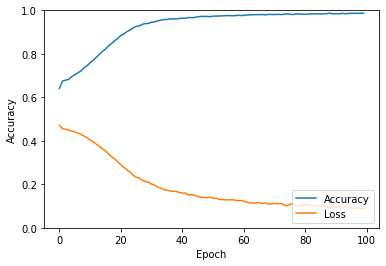

In [268]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label = 'Loss')
#plt.plot(history.history['val_loss'], label = 'Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [247]:
type(y_test)

pandas.core.series.Series

In [269]:
prediction = [1 if x > 0.5 else 0 for x in predictions]

In [270]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction))

[[47615 27015]
 [ 2589  3964]]


In [267]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [278]:
probs = predictions[:, 1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
# impute missing values
(df_drop.isna().sum()/df_drop.shape[0]).sort_values()

In [ ]:
(list(set(list(obj_df.columns) + list(cat_cnt[cat_cnt[0]==2]['index'])))).nunique()

In [ ]:
cat_cnt = df_drop.nunique().sort_values().reset_index()
obj_cols = list(cat_cnt[cat_cnt[0]==2]['index'])
for col_name in obj_cols:
    df_drop[col_name] = df_drop[col_name].astype('category')

obj_df = df_drop.select_dtypes(include=[object])
obj_cols = list(obj_df.columns)
for col_name in obj_cols:
    df_drop[col_name] = df_drop[col_name].astype('category')

In [ ]:
df_drop.dtypes.value_counts()

In [ ]:
# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df_drop.drop(columns=list(cat_cnt[cat_cnt[0]==2]['index'])).select_dtypes(exclude=[object]))
  
df_imp = imputer.transform(df_drop.drop(columns=list(cat_cnt[cat_cnt[0]==2]['index'])).select_dtypes(exclude=[object]))
df_imp

In [ ]:
df.dtypes.loc[(df.isna().sum()/df.shape[0]).sort_values(ascending=False).head(20).index]

In [ ]:
# profile = ProfileReport(df)
# profile.to_widgets()
# For large datasets
profile = ProfileReport(df, minimal=True)

In [ ]:
profile.to_file("df_profile_output.html")

In [ ]:
df.duplicated().sum()

In [ ]:
corr_outcome = df.corr(method='pearson')['TARGET'].sort_values()
corr_outcome

In [ ]:
# Create correlation matrix
corr_mat = df.TARGET.to_frame().corrwith(df)
#df1.corrwith(df2, axis = 0)
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()

In [ ]:
df.select_dtypes('int').columns

In [ ]:
#num_tbl = df.select_dtypes(exclude=[object]).describe().T.reset_index()
df.describe().T.reset_index().query('min==0.0')

In [ ]:
cat_cols = df.select_dtypes(include=[object])

num_cols = df.select_dtypes(exclude=[object])

In [ ]:
# numeric scaling
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
transformer = make_column_transformer(  # this function scales and encodes our data in 1 step
    (MinMaxScaler(), # columns to scale
        num_cols),
    (OneHotEncoder(handle_unknown='ignore'), # columns to encode
        cat_cols)
)

In [ ]:
2. Data Cleaning
3. EDA (Provide insights based on ANALYSIS prior to building the model)
    - Training data only
    - Include description and conclusions
4. Scaling/Normalizing/OHE
    - Update appropriate EDA
5. Algorithm Harness to choose the BEST model
    - Leverage code at begining of course to get output from different methods
    - Choose two models (likley logistic and NN) to build and compare
6. Hyperparameter Tuning
7. Create a Web Service from your model and call it from a Web Application